# Avalanches and Weather with Working Data

---
Sarah Braverman

---

In [12]:
import pandas as pd
import numpy as np


In [53]:
avywx = pd.read_pickle('data-prep/pkl/avywx2.pkl')
avywx


,avpathid,avobsdate,avobstime,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,time,dt,wx_dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,12:45:00,2012-03-26 12:45:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PATH1163,2012-03-16,08:30:00,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,08:30:00,2012-03-16 08:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CURLY,2012-03-16,08:34:00,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,08:34:00,2012-03-16 08:34:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHED10,2012-03-10,14:50:00,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,14:50:00,2012-03-10 14:50:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INFINITY,2012-03-10,14:54:00,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,14:54:00,2012-03-10 14:54:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,05:04:00,2022-03-01 05:04:00,2022-03-01 05:00:00,31.0,30.0,96.0,NaN,NaN,NW,4G15,NaN,79.8,0.0,0.2,11.1,S11MT,2022,NaN,NaN,NaN,NaN,NaN
505,AP1163H,2022-03-23,13:30:00,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,13:30:00,2022-03-23 13:30:00,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,0.0,0.0,0.0,S11MT,2022,NaN,NaN,NaN,NaN,NaN
506,SHED10,2022-03-23,13:30:00,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,13:30:00,2022-03-23 13:30:00,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,0.0,0.0,0.0,S11MT,2022,NaN,NaN,NaN,NaN,NaN


Looking at data from only path1163

In [24]:
path1163 = avywx.loc[avywx['avpathid'] == "PATH1163"]


In [26]:
sf24 = path1163.loc[avywx['snowfall_24hr'].notnull()]

sf24["snowfall_24hr"].describe()

count    20.000000
mean      8.190000
std      18.686525
min       0.000000
25%       0.000000
50%       3.750000
75%       7.800000
max      84.800000
Name: snowfall_24hr, dtype: float64

In [27]:
sd = path1163.loc[avywx['snow_depth'].notnull()]

sd["snow_depth"].describe()

count    20.000000
mean     67.600000
std      13.947986
min      31.500000
25%      60.775000
50%      64.350000
75%      78.625000
max      87.000000
Name: snow_depth, dtype: float64

Looking at path JAKES

In [28]:
jakes = avywx.loc[avywx['avpathid'] == "JAKES"]

In [31]:
jakessf24 = jakes.loc[avywx['snowfall_24hr'].notnull()]

jakessf24["snowfall_24hr"].describe()

count    2.000000
mean     3.150000
std      4.454773
min      0.000000
25%      1.575000
50%      3.150000
75%      4.725000
max      6.300000
Name: snowfall_24hr, dtype: float64

In [32]:
jakessd = jakes.loc[avywx['snow_depth'].notnull()]

jakessd["snow_depth"].describe()

count     2.000000
mean     77.700000
std       9.192388
min      71.200000
25%      74.450000
50%      77.700000
75%      80.950000
max      84.200000
Name: snow_depth, dtype: float64

In [70]:
avywx["avpathid"].value_counts()

PATH1163      105
INFINITY       58
SHED10         35
SHED07W        28
SHED11         23
JAKES          20
SHED07E        17
SHED08         16
JAVA           15
AP1163H        14
GRIZZLY        13
BURNOUT        10
UMBRELLA       10
LARRY          10
SHED09L         8
CURLY           8
SHED107         7
SHED05          7
SHED09          6
GOATLICK        6
JAVAGA          5
IBEAM           5
TestSlope2      5
MCAMSER         5
SECOND          5
SHED07          4
MSHLDS          4
CB1160          4
TestSlope3      4
SHED06          4
SHED04D         3
BROKEN          3
CB1164          3
AP1183          2
CB1159          2
FRYPAN          2
SHED12          2
TestSlope1      2
ELKFENCE        2
NOSHED          1
MO              1
CB1160-3        1
1155CUTBAN      1
ELKMTN          1
ESSEXMTN        1
HANGINGNO       1
MCAMNF          1
SHED07WP        1
Name: avpathid, dtype: int64

## Making Visualizations :)

Something is wrong here, but it looks cool, so I'll take it

/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/op

<AxesSubplot:xlabel='dt', ylabel='Density'>

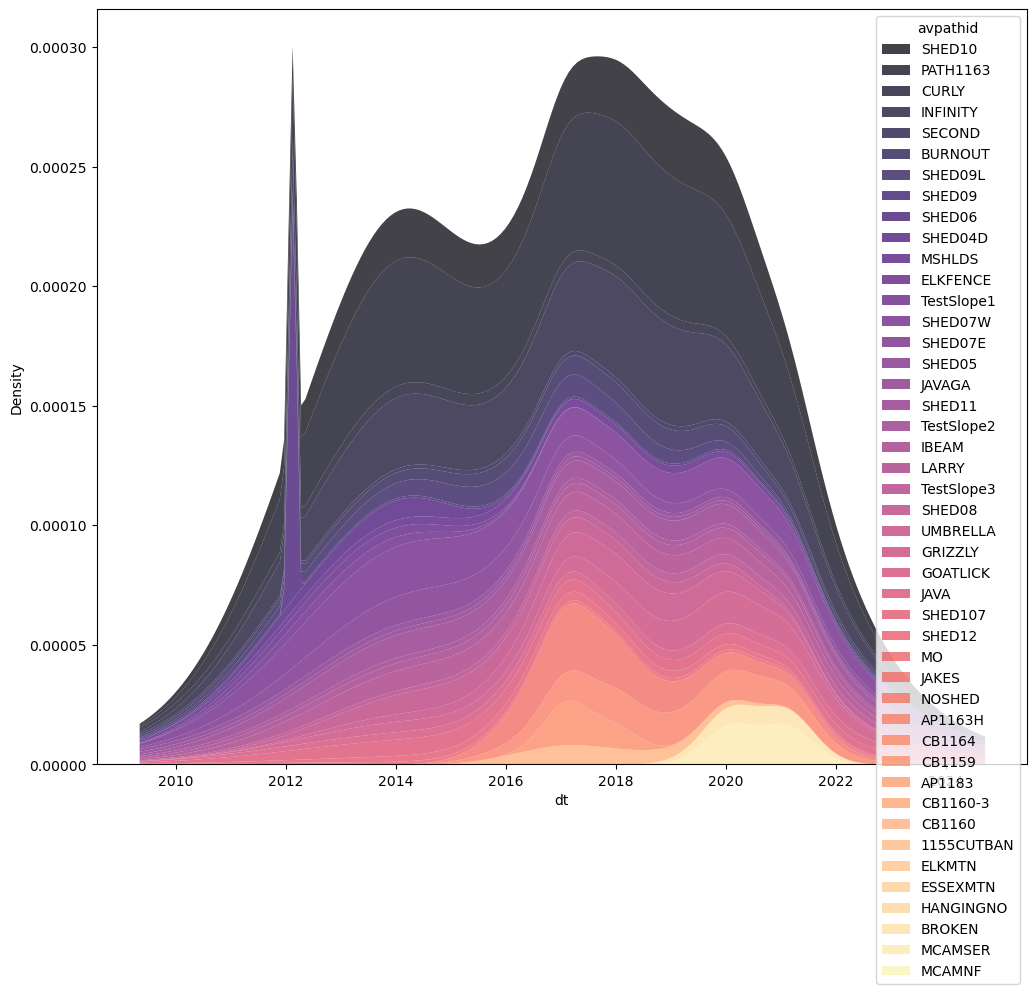

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

avywxmid = avywx.loc[avywx['dt'] >= "2012-01-01 12:00:00"]
avywxnew = avywxmid.loc[avywxmid['dt'] <= "2022-01-01 12:00:00"]

figure(figsize=(12, 10), dpi=100)

# It looks very strange, so I gave up on this one
sns.kdeplot(data = avywxnew, x = "dt", shade = True, hue = "avpathid", multiple="stack", linewidth=0, palette = "magma")

/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sarahbraverman/op

<AxesSubplot:xlabel='dt', ylabel='Density'>

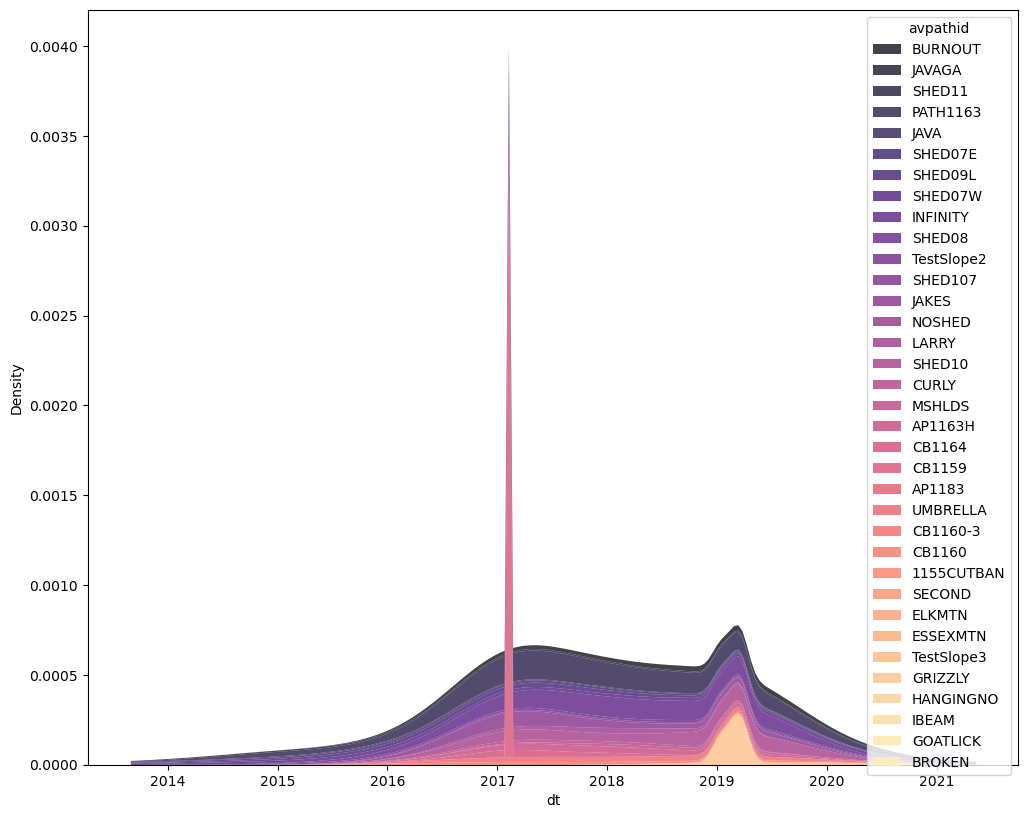

In [85]:
avywxmid2 = avywx.loc[avywx['dt'] >= "2015-01-01 12:00:00"]
avywxnew2 = avywxmid2.loc[avywxmid2['dt'] <= "2020-01-01 12:00:00"]

figure(figsize=(12, 10), dpi=100)

# It looks very strange, so I gave up on this one
sns.kdeplot(data = avywxnew2, x = "dt", shade = True, hue = "avpathid", multiple="stack", linewidth=0, palette = "magma")

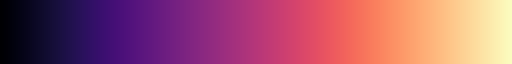

In [84]:
sns.color_palette("magma", as_cmap=True)
